In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)

In [4]:
df=pd.read_csv('portu_banking_final.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [57]:
df_train = df[:1460]
df_test = df[1460:]

In [58]:
data_corr = df_train.corr()
data_corr

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,1.000000,-0.071872,-0.041889,0.023125,0.012011,0.057686,0.006261,0.010368,-0.011218,0.407569
campaign,-0.071872,1.000000,0.013649,-0.070871,0.138853,0.103957,0.011005,0.124500,0.134566,-0.071502
pdays,-0.041889,0.013649,1.000000,-0.237230,0.114684,-0.014739,-0.024967,0.131200,0.184936,-0.166004
previous,0.023125,-0.070871,-0.237230,1.000000,-0.393421,-0.150444,-0.053250,-0.427754,-0.498900,0.214662
emp_var_rate,0.012011,0.138853,0.114684,-0.393421,1.000000,0.772084,0.244251,0.973258,0.909471,-0.309548
cons_price_idx,0.057686,0.103957,-0.014739,-0.150444,0.772084,1.000000,0.102068,0.686186,0.519818,-0.118981
cons_conf_idx,0.006261,0.011005,-0.024967,-0.053250,0.244251,0.102068,1.000000,0.325899,0.145829,0.036514
euribor3m,0.010368,0.124500,0.131200,-0.427754,0.973258,0.686186,0.325899,1.000000,0.944852,-0.318107
nr_employed,-0.011218,0.134566,0.184936,-0.498900,0.909471,0.519818,0.145829,0.944852,1.000000,-0.372012
y,0.407569,-0.071502,-0.166004,0.214662,-0.309548,-0.118981,0.036514,-0.318107,-0.372012,1.000000


In [60]:
data_corr = df_test.corr()
data_corr

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,1.000000,-0.071706,-0.045495,0.020554,-0.029333,0.003510,-0.008701,-0.034396,-0.045850,0.405214
campaign,-0.071706,1.000000,0.049317,-0.079464,0.151187,0.128723,-0.014649,0.135522,0.144443,-0.066172
pdays,-0.045495,0.049317,1.000000,-0.556452,0.258834,0.079423,-0.089608,0.282484,0.352996,-0.307002
previous,0.020554,-0.079464,-0.556452,1.000000,-0.421549,-0.205177,-0.050854,-0.455545,-0.501458,0.230788
emp_var_rate,-0.029333,0.151187,0.258834,-0.421549,1.000000,0.775459,0.194315,0.972211,0.906880,-0.297930
cons_price_idx,0.003510,0.128723,0.079423,-0.205177,0.775459,1.000000,0.057441,0.688313,0.522118,-0.136840
cons_conf_idx,-0.008701,-0.014649,-0.089608,-0.050854,0.194315,0.057441,1.000000,0.275935,0.098886,0.055535
euribor3m,-0.034396,0.135522,0.282484,-0.455545,0.972211,0.688313,0.275935,1.000000,0.945168,-0.307396
nr_employed,-0.045850,0.144443,0.352996,-0.501458,0.906880,0.522118,0.098886,0.945168,1.000000,-0.354052
y,0.405214,-0.066172,-0.307002,0.230788,-0.297930,-0.136840,0.055535,-0.307396,-0.354052,1.000000


In [61]:
df = df.drop(['poutcome'],axis =1
df = df.drop(['day_of_week'],axis =1)

SyntaxError: invalid syntax (<ipython-input-61-f2a184c84595>, line 2)

In [62]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [63]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [64]:
null_per = df.isnull().sum()/len(df) *100

In [65]:
null_per

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64

In [66]:
X = df.iloc[:, :-1]
display(X)
y = df.iloc[:, -1]
display(y)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5


0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [67]:
df.groupby(['y', 'job', 'marital', 'education']).mean()

duration  campaign       pdays  \
y job         marital  education                                                
0 ADMIN.      married  university.degree     744.000000  1.000000  999.000000   
              single   university.degree     530.000000  2.000000  999.000000   
  BLUE-COLLAR married  basic.4y                5.000000  7.000000  999.000000   
  HOUSEMAID   divorced basic.4y               84.000000  1.000000  999.000000   
  MANAGEMENT  M        university.degree    1225.000000  2.000000  999.000000   
...                                                 ...       ...         ...   
1 unknown     single   professional.course  2029.000000  1.000000  999.000000   
                       university.degree     633.666667  2.111111  777.666667   
                       unknown               712.500000  1.000000  999.000000   
              unknown  university.degree     617.000000  4.000000  999.000000   
                       unknown               541.000000  1.000000  999.000000   

                                            previous  emp_var_rate  \
y job         marital  education                                     
0 ADMIN.      married  university.degree    0.000000          1.10   
              single   university.degree    0.000000          1.10   
  BLUE-COLLAR married  basic.4y             1.000000         -1.80   
  HOUSEMAID   divorced basic.4y             0.000000         -0.10   
  MANAGEMENT  M        university.degree    0.000000         -2.90   
...                                              ...           ...   
1 unknown     single   professional.course  0.000000          1.40   
                       university.degree    0.777778         -1.90   
                       unknown              0.500000         -1.15   
              unknown  university.degree    0.000000          1.10   
                       unknown              0.000000          1.40   

                                            cons_price_idx  cons_conf_idx  \
y job         marital  education                                            
0 ADMIN.      married  university.degree         93.994000     -36.400000   
              single   university.degree         93.994000     -36.400000   
  BLUE-COLLAR married  basic.4y                  92.893000     -46.200000   
  HOUSEMAID   divorced basic.4y                  93.200000     -42.000000   
  MANAGEMENT  M        university.degree         92.201000     -31.400000   
...                                                    ...            ...   
1 unknown     single   professional.course       93.918000     -42.700000   
                       university.degree         93.541889     -41.388889   
                       unknown                   93.186500     -33.100000   
              unknown  university.degree         93.994000     -36.400000   
                       unknown                   93.918000     -42.700000   

                                            euribor3m  nr_employed  
y job         marital  education                                    
0 ADMIN.      married  university.degree     4.860000  5191.000000  
              single   university.degree     4.857000  5191.000000  
  BLUE-COLLAR married  basic.4y              1.281000  5099.100000  
  HOUSEMAID   divorced basic.4y              4.153000  5195.800000  
  MANAGEMENT  M        university.degree     0.884000  5076.200000  
...                                               ...          ...  
1 unknown     single   professional.course   4.963000  5228.100000  
                       university.degree     1.534889  5067.422222  
                       unknown               2.833000  5104.250000  
              unknown  university.degree     4.855000  5191.000000  
                       unknown               4.957000  5228.100000  

[538 rows x 9 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [35]:
import seaborn as sns

In [69]:
df.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [39]:
df = pd.DataFrame({'job':['ADMIN.', 'BLUE-COLLAR', 'HOUSEMAID', 'MANAGEMENT'], 'val':[0,1]})
ax = df.plot.bar(x='job', y='cons_price_idx', rot=0)

#df = pd.DataFrame({'marital':['married', 'single', 'divorced'], 'val':[0,1]})
#ax = df.plot.bar(x='marital', y='val', rot=0)


ValueError: arrays must all be same length

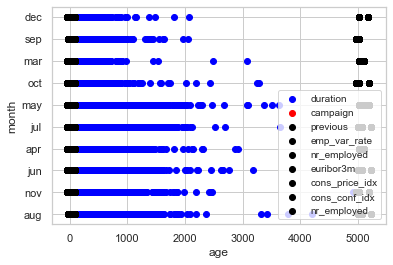

In [29]:
plt.xlabel('age')
plt.ylabel('month')

pltX = df.loc[:, 'duration']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='blue', label='duration')


pltX = df.loc[:, 'campaign']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='red', label='campaign')

pltX = df.loc[:, 'previous']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='previous')

pltX = df.loc[:, 'emp_var_rate']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='emp_var_rate')


pltX = df.loc[:, 'nr_employed']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='nr_employed')

pltX = df.loc[:, 'euribor3m']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='euribor3m')

pltX = df.loc[:, 'cons_price_idx']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='cons_price_idx')


pltX = df.loc[:, 'cons_conf_idx']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='cons_conf_idx')

pltX = df.loc[:, 'nr_employed']
pltY = df.loc[:,'month']
plt.scatter(pltX, pltY, color='black', label='nr_employed')






plt.legend(loc=4, prop={'size':10})
plt.show()

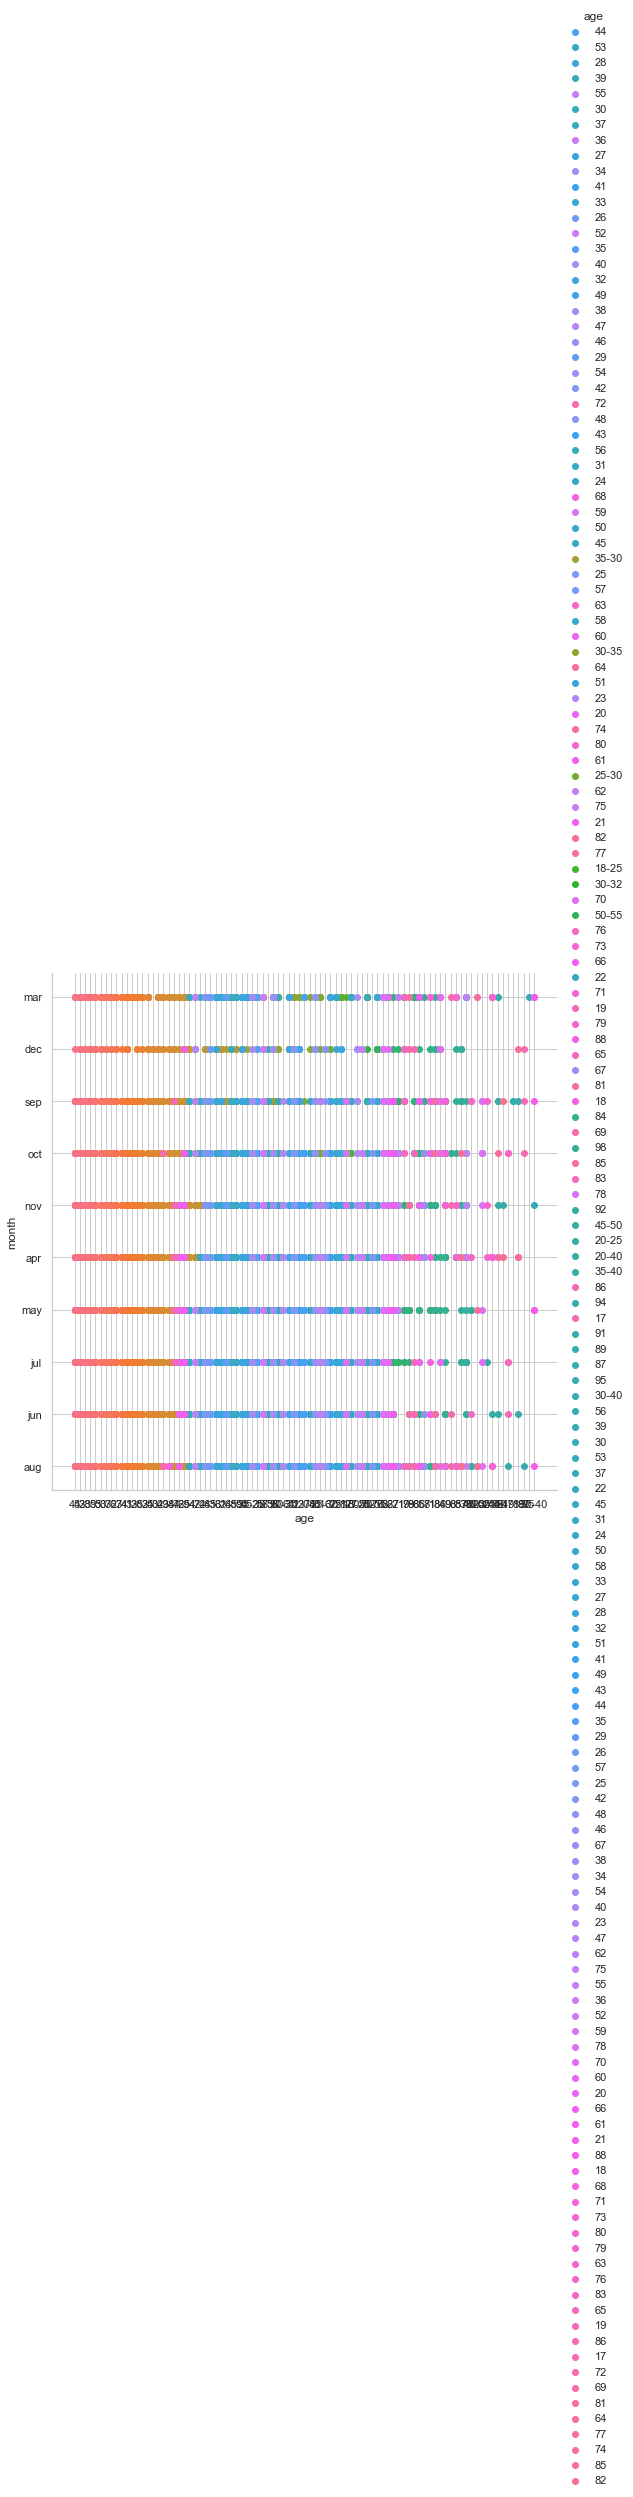

In [30]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="age",size=8) \
    .map(plt.scatter,"age","month") \
    .add_legend()
plt.show()

In [43]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='month', z='month',color='age')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [70]:
x_dftrain, x_dftest, y_dftrain, y_test = train_test_split('job', 'age', test_size=0.2)

NameError: name 'train_test_split' is not defined

In [72]:
model = LogisticRegression(verbose=1)
model.fit(x_df_train, y_df_train)

NameError: name 'LogisticRegression' is not defined

In [52]:
predictions = model.predict(x_df_test)
print(predictions)

print( classification_report(y_df_test, predictions) )



NameError: name 'model' is not defined

In [48]:
from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['marital','job','age']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'accuracy_score' is not defined

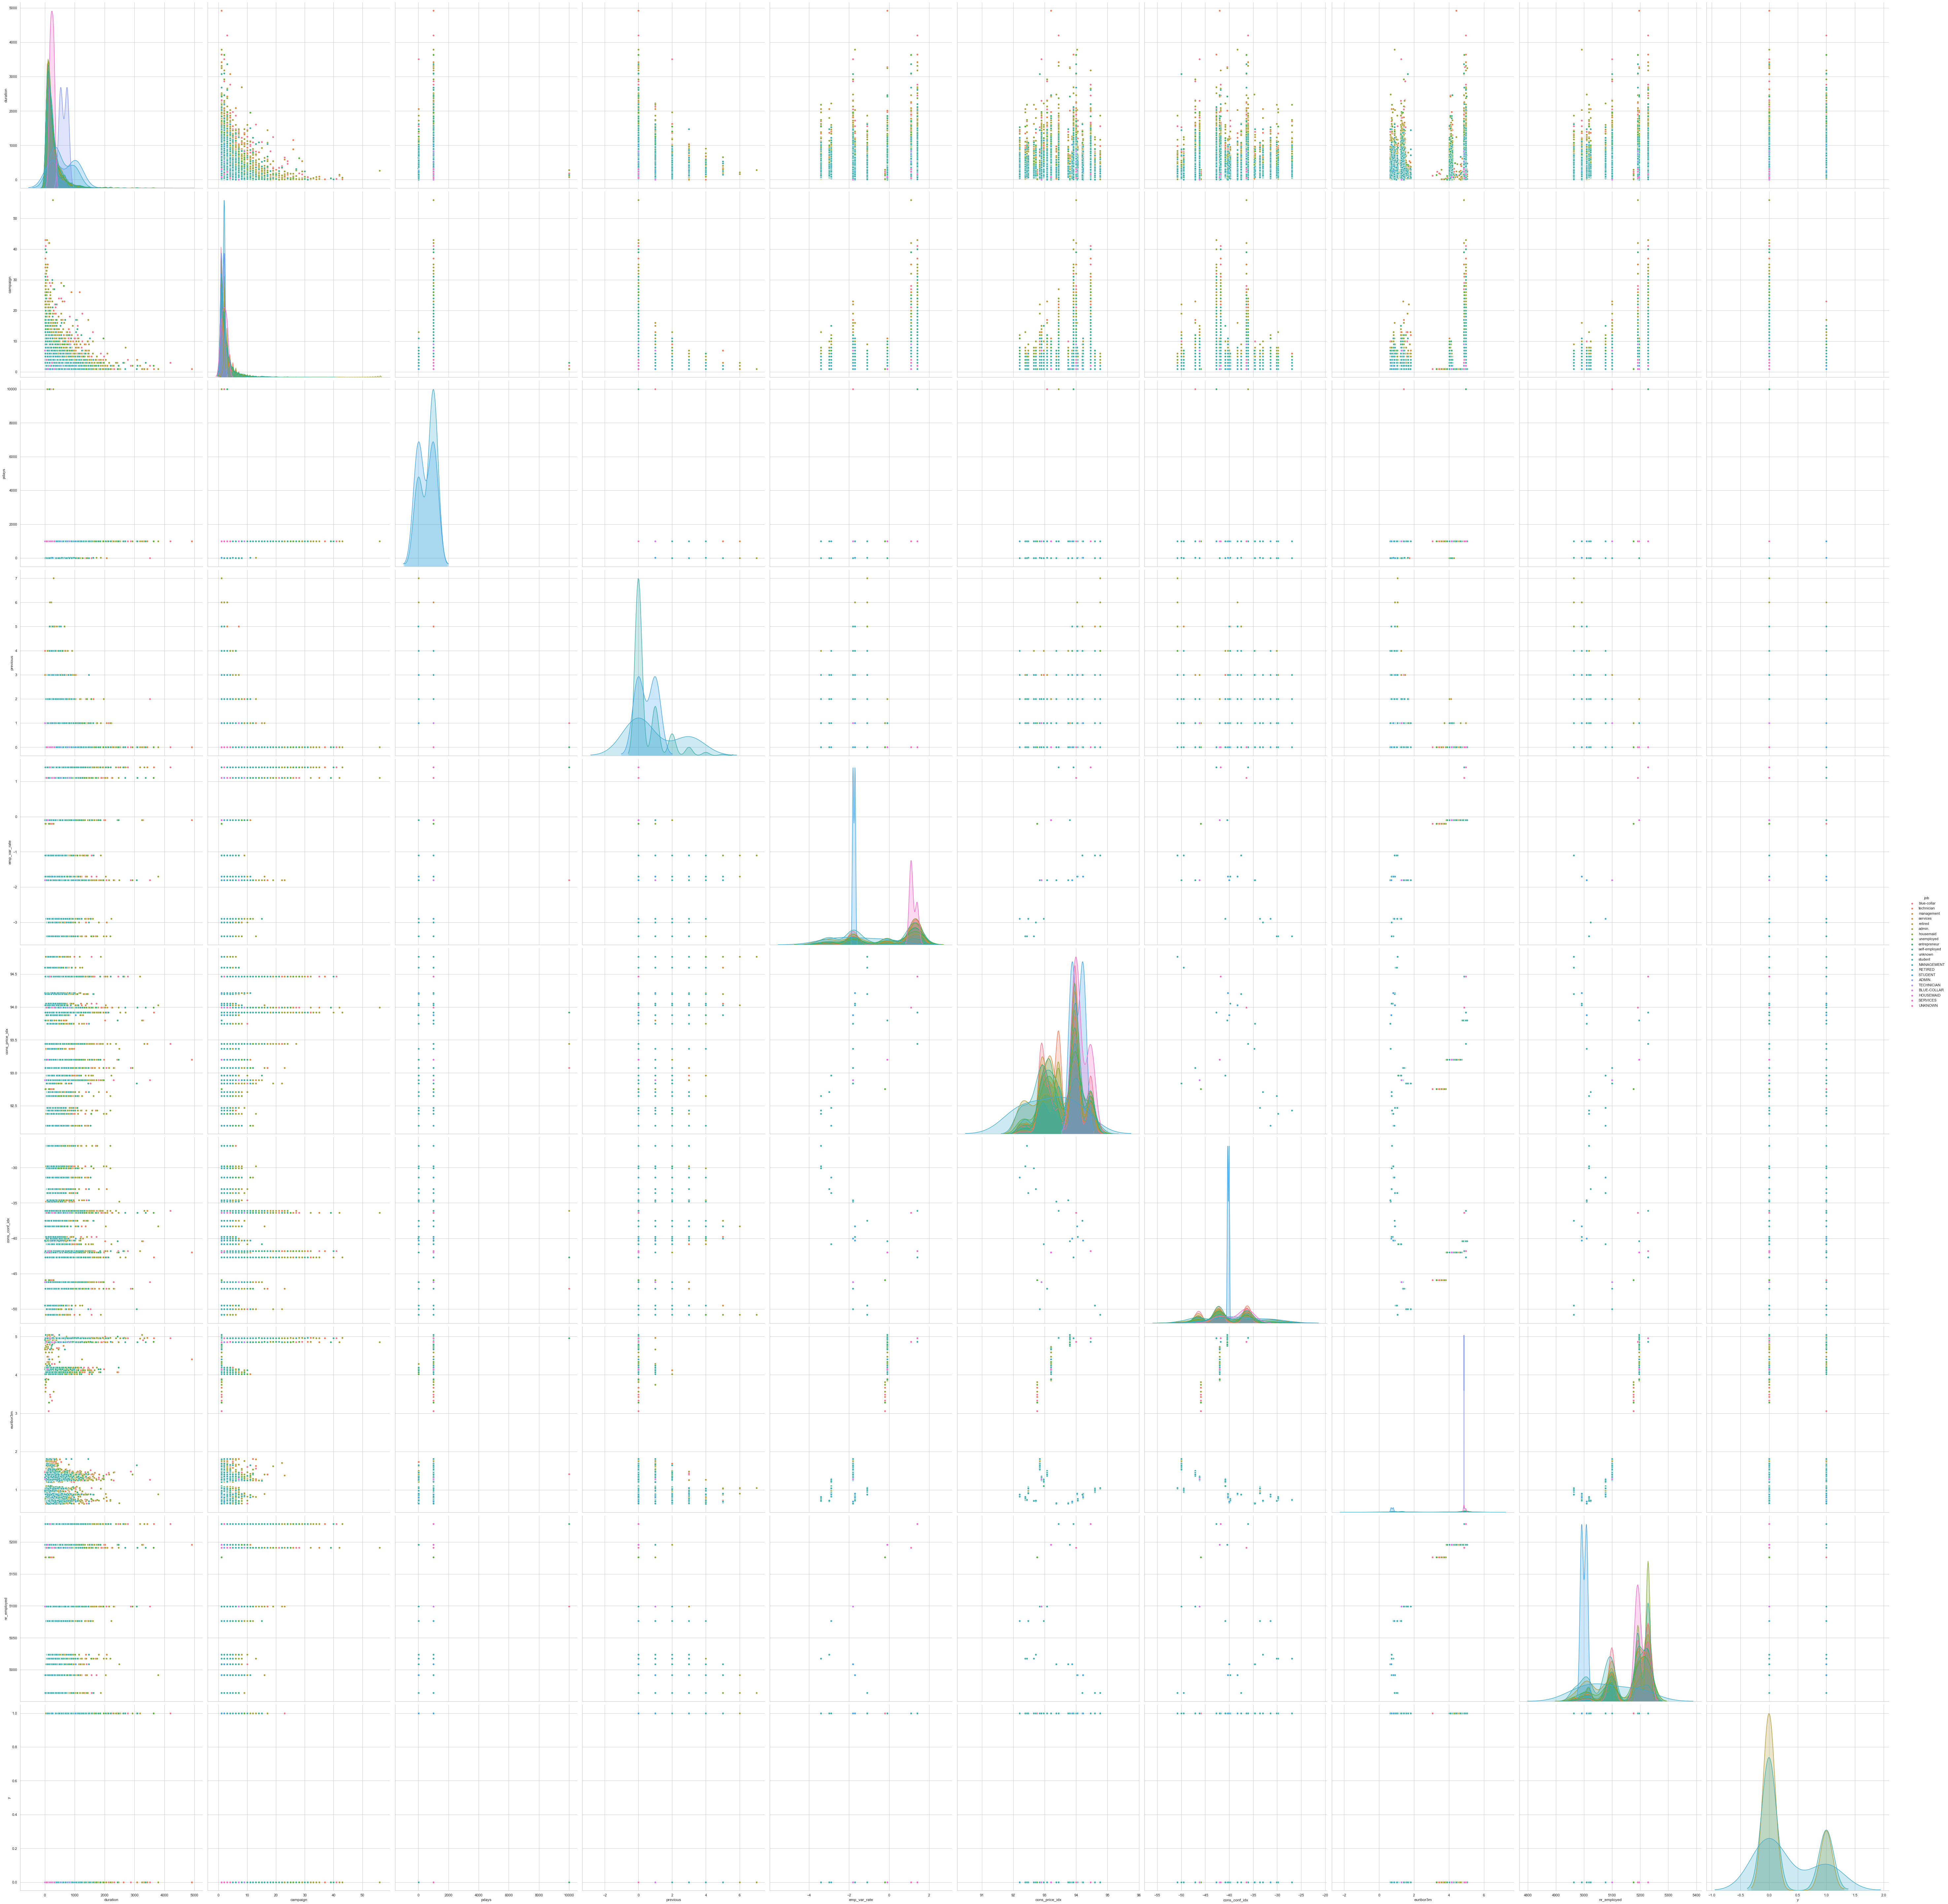

In [50]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="job",size=8);
plt.show()